# Capstone 3 Customer Personality Analysis

In [186]:
import pandas as pd
import numpy as np
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.cluster import MiniBatchKMeans
from sklearn import datasets, metrics
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import DBSCAN
from sklearn.mixture import GaussianMixture
from sklearn.model_selection import GridSearchCV
from sqlalchemy import create_engine
from sklearn.datasets import fetch_openml
from sklearn.manifold import TSNE
import time
from datetime import datetime
#!pip install yellowbrick
from yellowbrick.cluster import KElbowVisualizer
import matplotlib as mp
import random
import umap
import warnings
warnings.filterwarnings('ignore')

In [187]:
np.random.seed(243)
random.seed(243)

# Table of Content
## 1. Readin dataset
## 2. Data cleaning
## 3. EDA
## 4. Feature engineering
## 5. Dimentionality reduction
## 6. Clustering
## 7. Model evaluation
## 8. Data analysis
   ### 8.1 Demographics
   ### 8.2 Bussiness related
   ### 8.3 Behavior to campaign
   ### 8.4 Full analysis

# 1. Readin in dataset

This dataset is from Kaggle: https://www.kaggle.com/datasets/imakash3011/customer-personality-analysis

Below is the descriptions for each feature from Kaggle: 

ID: Customer's unique identifier
Year_Birth: Customer's birth year
Education: Customer's education level
Marital_Status: Customer's marital status
Income: Customer's yearly household income
Kidhome: Number of children in customer's household
Teenhome: Number of teenagers in customer's household
Dt_Customer: Date of customer's enrollment with the company
Recency: Number of days since customer's last purchase
Complain: 1 if the customer complained in the last 2 years, 0 otherwise

Products
MntWines: Amount spent on wine in last 2 years
MntFruits: Amount spent on fruits in last 2 years
MntMeatProducts: Amount spent on meat in last 2 years
MntFishProducts: Amount spent on fish in last 2 years
MntSweetProducts: Amount spent on sweets in last 2 years
MntGoldProds: Amount spent on gold in last 2 years

Promotion
NumDealsPurchases: Number of purchases made with a discount
AcceptedCmp1: 1 if customer accepted the offer in the 1st campaign, 0 otherwise
AcceptedCmp2: 1 if customer accepted the offer in the 2nd campaign, 0 otherwise
AcceptedCmp3: 1 if customer accepted the offer in the 3rd campaign, 0 otherwise
AcceptedCmp4: 1 if customer accepted the offer in the 4th campaign, 0 otherwise
AcceptedCmp5: 1 if customer accepted the offer in the 5th campaign, 0 otherwise
Response: 1 if customer accepted the offer in the last campaign, 0 otherwise
Place

NumWebPurchases: Number of purchases made through the company’s website
NumCatalogPurchases: Number of purchases made using a catalogue
NumStorePurchases: Number of purchases made directly in stores
NumWebVisitsMonth: Number of visits to company’s website in the last month

In [2]:
df = pd.read_csv('dataset/marketing_campaign.csv', sep='\t')

In [3]:
#Dataset overview
df

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,13-06-2013,46,709,...,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,Together,64014.0,2,1,10-06-2014,56,406,...,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,25-01-2014,91,908,...,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,Master,Together,69245.0,0,1,24-01-2014,8,428,...,3,0,0,0,0,0,0,3,11,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [5]:
df.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2240.000000,2240.000000,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,...,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000
mean,5592.159821,1968.805804,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,...,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,3.0,11.0,0.149107
std,3246.662198,11.984069,25173.076661,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,...,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.0,0.0,0.356274
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2828.250000,1959.000000,35303.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,...,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,...,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8427.750000,1977.000000,68522.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,...,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,...,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000


# 2. Data cleaning

1. Missing values
2. Drop unrelated features
3. Deal with outlier

### (1) Missing values

In [6]:
#checking missing value
df.isnull().sum()/df.shape[0]*100
# There is very small amount of missing values(~1%), so we will drop those rows (24 row in total) for now 

ID                     0.000000
Year_Birth             0.000000
Education              0.000000
Marital_Status         0.000000
Income                 1.071429
Kidhome                0.000000
Teenhome               0.000000
Dt_Customer            0.000000
Recency                0.000000
MntWines               0.000000
MntFruits              0.000000
MntMeatProducts        0.000000
MntFishProducts        0.000000
MntSweetProducts       0.000000
MntGoldProds           0.000000
NumDealsPurchases      0.000000
NumWebPurchases        0.000000
NumCatalogPurchases    0.000000
NumStorePurchases      0.000000
NumWebVisitsMonth      0.000000
AcceptedCmp3           0.000000
AcceptedCmp4           0.000000
AcceptedCmp5           0.000000
AcceptedCmp1           0.000000
AcceptedCmp2           0.000000
Complain               0.000000
Z_CostContact          0.000000
Z_Revenue              0.000000
Response               0.000000
dtype: float64

In [7]:
# There is very small amount of missing values(~1%), so we will drop those rows (24 row in total) for now 
df1 = df.dropna()
df1

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,13-06-2013,46,709,...,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,Together,64014.0,2,1,10-06-2014,56,406,...,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,25-01-2014,91,908,...,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,Master,Together,69245.0,0,1,24-01-2014,8,428,...,3,0,0,0,0,0,0,3,11,0


### (2) Drop some unrelated columns

In [8]:
# drop three columns that have no meaningful information
df1.drop(columns=['ID', 'Z_CostContact', 'Z_Revenue'], inplace=True, axis=1)

In [9]:
df1

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response
0,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,88,...,10,4,7,0,0,0,0,0,0,1
1,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,1,...,1,2,5,0,0,0,0,0,0,0
2,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,49,...,2,10,4,0,0,0,0,0,0,0
3,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,4,...,0,4,6,0,0,0,0,0,0,0
4,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,43,...,3,6,5,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,1967,Graduation,Married,61223.0,0,1,13-06-2013,46,709,43,...,3,4,5,0,0,0,0,0,0,0
2236,1946,PhD,Together,64014.0,2,1,10-06-2014,56,406,0,...,2,5,7,0,0,0,1,0,0,0
2237,1981,Graduation,Divorced,56981.0,0,0,25-01-2014,91,908,48,...,3,13,6,0,1,0,0,0,0,0
2238,1956,Master,Together,69245.0,0,1,24-01-2014,8,428,30,...,5,10,3,0,0,0,0,0,0,0


## (3) Deal with outliers

In [10]:
cols_int = df1.select_dtypes(include=['int64', 'float64']).columns
cols_int.shape

(23,)

In [11]:
cols_int

Index(['Year_Birth', 'Income', 'Kidhome', 'Teenhome', 'Recency', 'MntWines',
       'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Response'],
      dtype='object')

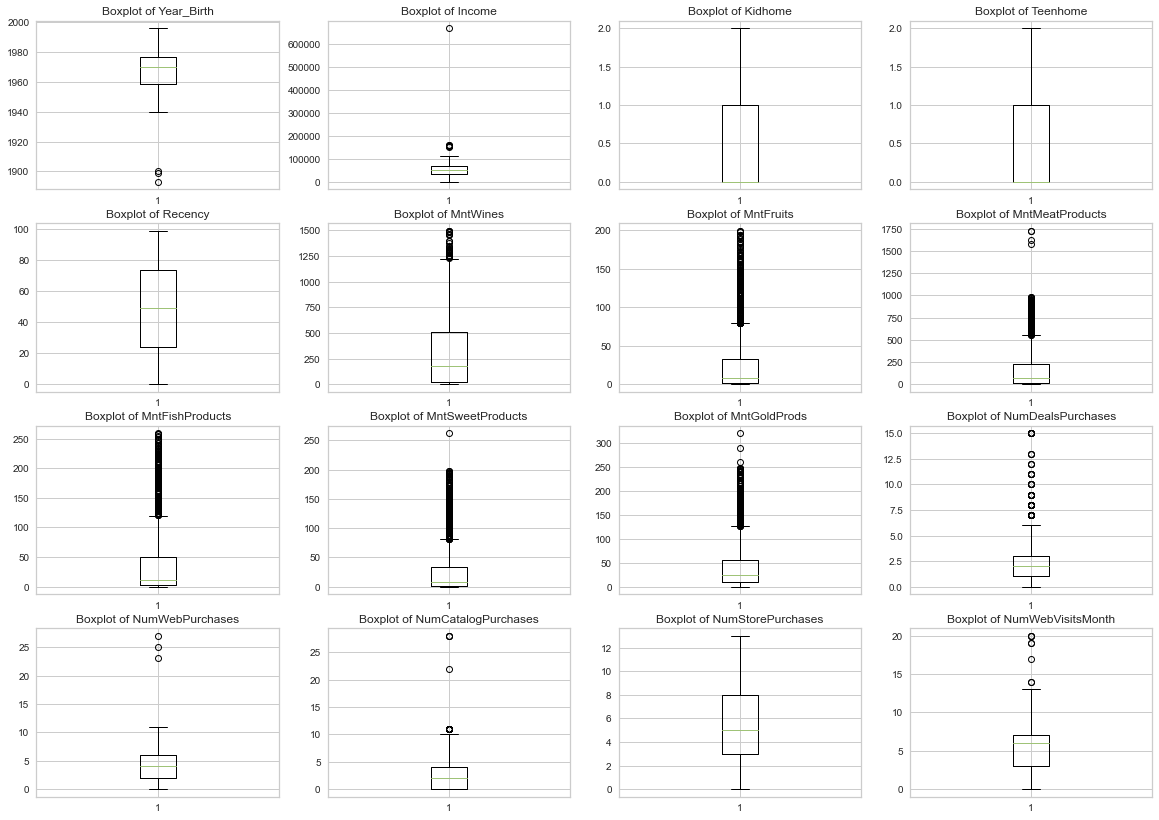

In [12]:
fig = plt.figure(figsize=(20, 18))
for count, item in enumerate(cols_int[0:16]):
    ax = fig.add_subplot(5, 4, count+1)
    #print(count, item)
    plt.boxplot(df1[item])
    plt.title('Boxplot of {}'.format(item))

In [13]:
#As can be seen, there are some outliers in the boxplot of 'Year_Birth' (the first histogram) and 
# 'Income' (the second histogram), so we will remove those outliers
print('the number of people whose income is higher than 500K is: {}'.format((df1['Income'] > 500000).sum()))
print('the number of people who was born before 1930 is: {}'.format((df1['Year_Birth'] < 1930).sum()))

the number of people whose income is higher than 500K is: 1
the number of people who was born before 1930 is: 3


In [14]:
# so we will drop those 4 observations as they are considered as outliers 
df1 = df1[df1['Income'] < 500000]
df1 = df1[df1['Year_Birth'] > 1930]
df1

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response
0,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,88,...,10,4,7,0,0,0,0,0,0,1
1,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,1,...,1,2,5,0,0,0,0,0,0,0
2,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,49,...,2,10,4,0,0,0,0,0,0,0
3,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,4,...,0,4,6,0,0,0,0,0,0,0
4,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,43,...,3,6,5,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,1967,Graduation,Married,61223.0,0,1,13-06-2013,46,709,43,...,3,4,5,0,0,0,0,0,0,0
2236,1946,PhD,Together,64014.0,2,1,10-06-2014,56,406,0,...,2,5,7,0,0,0,1,0,0,0
2237,1981,Graduation,Divorced,56981.0,0,0,25-01-2014,91,908,48,...,3,13,6,0,1,0,0,0,0,0
2238,1956,Master,Together,69245.0,0,1,24-01-2014,8,428,30,...,5,10,3,0,0,0,0,0,0,0


# 3. EDA

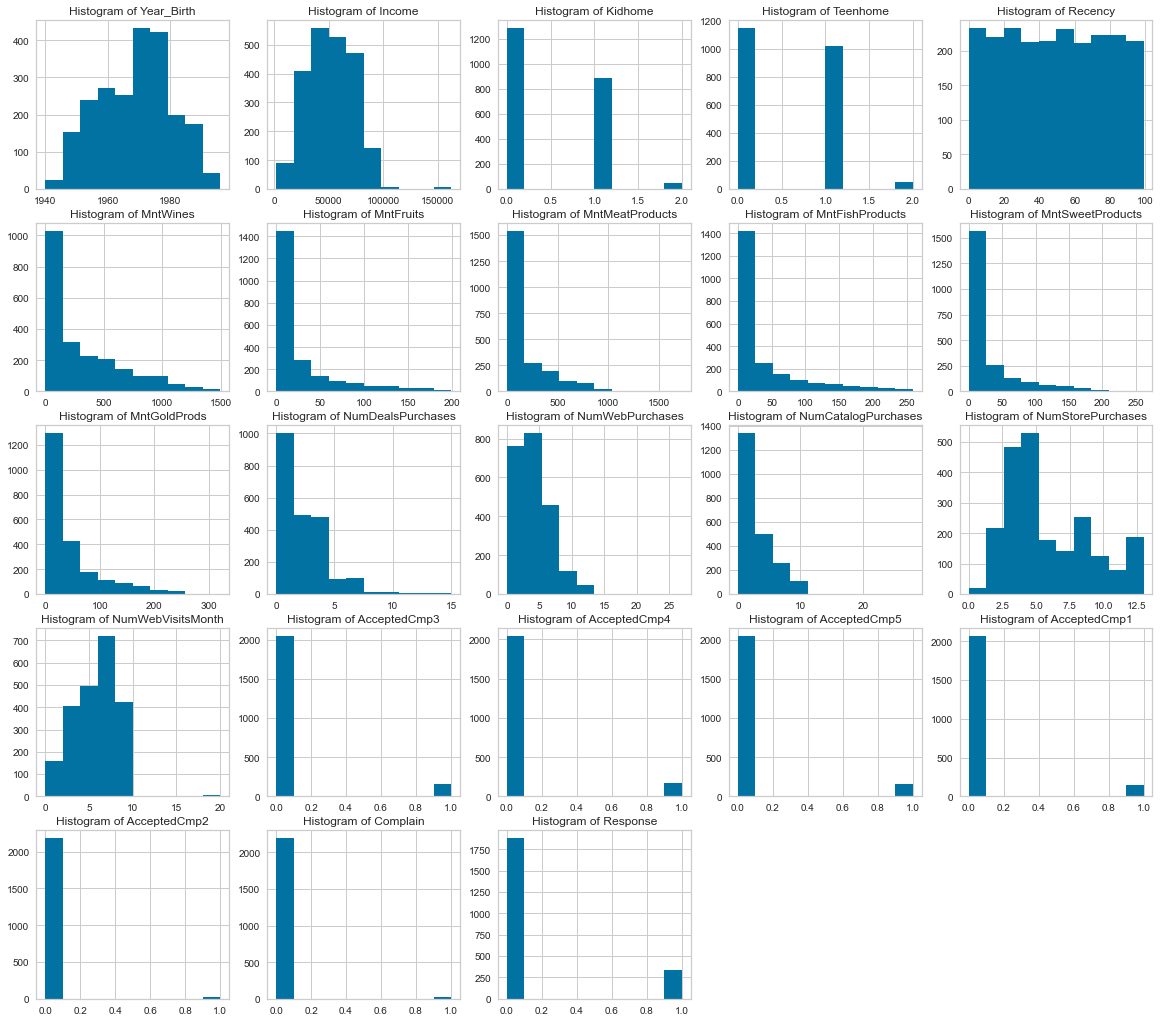

In [15]:
# Plot the histogram 
fig = plt.figure(figsize=(20, 18))
for count, item in enumerate(cols_int):
    ax = fig.add_subplot(5, 5, count+1)
    #print(count, item)
    plt.hist(df1[item])
    plt.title('Histogram of {}'.format(item))

<BarContainer object of 8 artists>

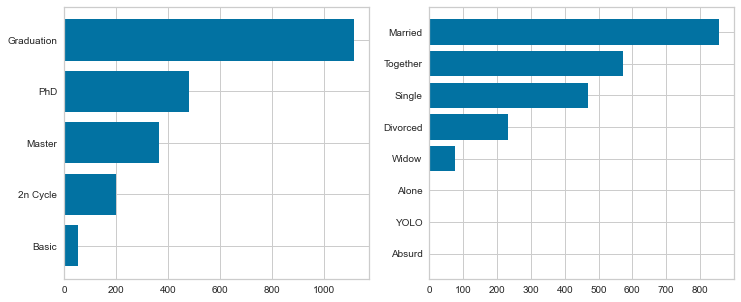

In [16]:
fig = plt.figure(figsize=(12, 5))
ax = fig.add_subplot(1,2,1)
plt.barh(df1.groupby(by='Education')['Education'].count().sort_values(ascending=True).index, 
       df1.groupby(by='Education')['Education'].count().sort_values(ascending=True).values)
ax = fig.add_subplot(1, 2, 2)
plt.barh(df1.groupby(by='Marital_Status')['Marital_Status'].count().sort_values(ascending=True).index,
        df1.groupby(by='Marital_Status')['Marital_Status'].count().sort_values(ascending=True).values)

<AxesSubplot:>

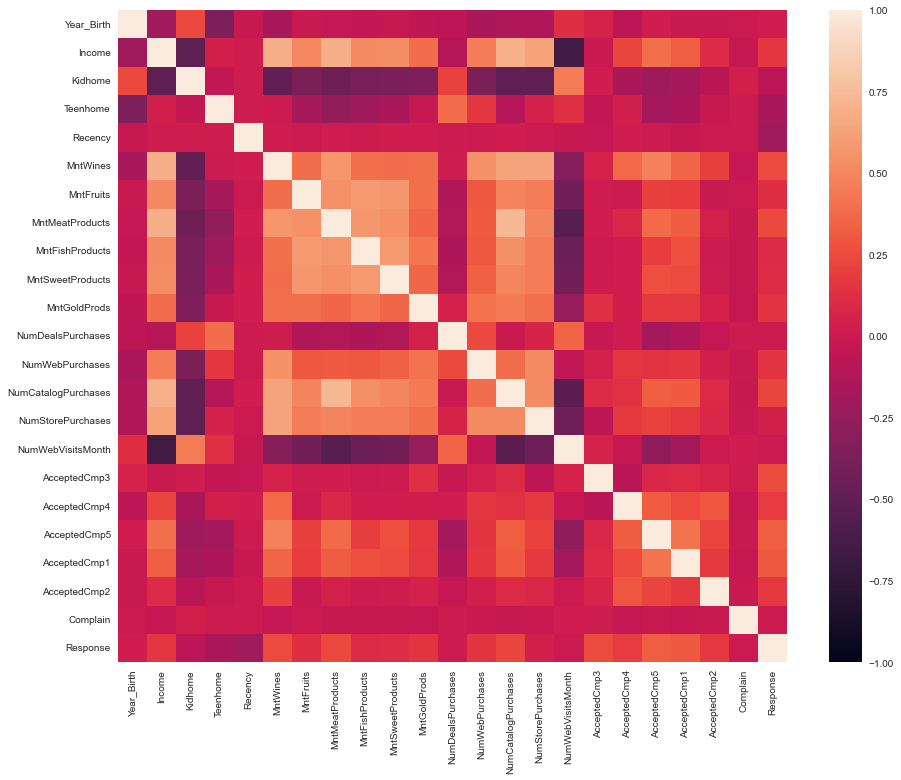

In [17]:
#check the correlation of each features
fig = plt.figure(figsize=(15, 12))
sns.heatmap(df1.corr(), vmin=-1)

In [18]:
#some of the features have high correlations, we will do feature engineering and dimentionality reduction, those will reduce the 
#features

# 4. Feature Engineering

## (1) Deal with some categorical feature

In [19]:
# convert the 'Dt_customer' feature into Datetime
df1['Dt_Customer'] = pd.to_datetime(df1['Dt_Customer'])

In [20]:
# Deal with some categorical feature, simplify the education level
df1['Education'].value_counts()

Graduation    1115
PhD            480
Master         365
2n Cycle       198
Basic           54
Name: Education, dtype: int64

In [21]:
#convert education level to 0-2 ('Basic': 0, 'Graduation'/'Master'/'2n Cycle': 1, 'PhD': 2)
df1.replace(to_replace=['Graduation','PhD', 'Master', 'Basic', '2n Cycle'], 
            value=[1,2,1,0,1], inplace=True)

In [22]:
# simplify the 'Marital_status' feature
df1['Marital_Status'].value_counts()

Married     857
Together    571
Single      470
Divorced    231
Widow        76
Alone         3
Absurd        2
YOLO          2
Name: Marital_Status, dtype: int64

In [23]:
#convert 'Marital_status' to 0 or 1 ('Married':1, 'Together':1, 'Single':0, 'Diverced':0, 'widow':0, 'Alone':0, 'Absurd':0, 'YOLO':0)
df1.replace(to_replace=['Married', 'Together', 'Single','Divorced', 'Widow', 'Alone', 'Absurd', 'YOLO'], 
           value=[1, 1, 0, 0, 0, 0, 0, 0], inplace=True)

In [24]:
#convert the 'year_birth' to age
df1['Age'] = 2022 - df1['Year_Birth']
df1.drop('Year_Birth', axis=1, inplace=True)

In [25]:
#convert the Dt_Customer to the total time the customer has enrolled with the company
df1['Len_Customer'] = (datetime.now() - df1['Dt_Customer']).dt.days
df1.drop('Dt_Customer', axis =1, inplace=True)

In [26]:
df1

,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Age,Len_Customer
0,1,0,58138.0,0,0,58,635,88,546,172,...,7,0,0,0,0,0,0,1,65,3666
1,1,0,46344.0,1,1,38,11,1,6,2,...,5,0,0,0,0,0,0,0,68,2820
2,1,1,71613.0,0,0,26,426,49,127,111,...,4,0,0,0,0,0,0,0,57,3167
3,1,1,26646.0,1,0,26,11,4,20,10,...,6,0,0,0,0,0,0,0,38,2760
4,2,1,58293.0,1,0,94,173,43,118,46,...,5,0,0,0,0,0,0,0,41,3016
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,1,1,61223.0,0,1,46,709,43,182,42,...,5,0,0,0,0,0,0,0,55,3236
2236,2,1,64014.0,2,1,56,406,0,30,0,...,7,0,0,0,1,0,0,0,76,2756
2237,1,0,56981.0,0,0,91,908,48,217,32,...,6,0,1,0,0,0,0,0,41,3010
2238,1,1,69245.0,0,1,8,428,30,214,80,...,3,0,0,0,0,0,0,0,66,3011


In [27]:
#Let's combined the 'Kidhome' and 'Teenhome'
df1['Children'] = df1['Kidhome'] + df1['Teenhome']
df1.drop(['Kidhome', 'Teenhome'], axis = 1, inplace=True)

In [28]:
df1

,Education,Marital_Status,Income,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Age,Len_Customer,Children
0,1,0,58138.0,58,635,88,546,172,88,88,...,0,0,0,0,0,0,1,65,3666,0
1,1,0,46344.0,38,11,1,6,2,1,6,...,0,0,0,0,0,0,0,68,2820,2
2,1,1,71613.0,26,426,49,127,111,21,42,...,0,0,0,0,0,0,0,57,3167,0
3,1,1,26646.0,26,11,4,20,10,3,5,...,0,0,0,0,0,0,0,38,2760,1
4,2,1,58293.0,94,173,43,118,46,27,15,...,0,0,0,0,0,0,0,41,3016,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,1,1,61223.0,46,709,43,182,42,118,247,...,0,0,0,0,0,0,0,55,3236,1
2236,2,1,64014.0,56,406,0,30,0,0,8,...,0,0,0,1,0,0,0,76,2756,3
2237,1,0,56981.0,91,908,48,217,32,12,24,...,0,1,0,0,0,0,0,41,3010,0
2238,1,1,69245.0,8,428,30,214,80,30,61,...,0,0,0,0,0,0,0,66,3011,1


## (2) Normalize the data

In [29]:
# normalize the data
df_scl = StandardScaler().fit_transform(df1)

In [30]:
# Dataset goes into dimentionality reduction
pd.DataFrame(df_scl, columns=df1.columns).head(5)

,Education,Marital_Status,Income,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Age,Len_Customer,Children
0,-0.426057,-1.349603,0.287105,0.310353,0.977660,1.552041,1.690293,2.453472,1.483713,0.852576,...,-0.282048,-0.282981,-0.280175,-0.261914,-0.117256,-0.09552,2.375425,1.018352,1.973583,-1.264598
1,-0.426057,-1.349603,-0.260882,-0.380813,-0.872618,-0.637461,-0.718230,-0.651004,-0.634019,-0.733642,...,-0.282048,-0.282981,-0.280175,-0.261914,-0.117256,-0.09552,-0.420977,1.274785,-1.665144,1.404572
2,-0.426057,0.740959,0.913196,-0.795514,0.357935,0.570540,-0.178542,1.339513,-0.147184,-0.037254,...,-0.282048,-0.282981,-0.280175,-0.261914,-0.117256,-0.09552,-0.420977,0.334530,-0.172664,-1.264598
3,-0.426057,0.740959,-1.176114,-0.795514,-0.872618,-0.561961,-0.655787,-0.504911,-0.585335,-0.752987,...,-0.282048,-0.282981,-0.280175,-0.261914,-0.117256,-0.09552,-0.420977,-1.289547,-1.923210,0.069987
4,1.786239,0.740959,0.294307,1.554453,-0.392257,0.419540,-0.218684,0.152508,-0.001133,-0.559545,...,-0.282048,-0.282981,-0.280175,-0.261914,-0.117256,-0.09552,-0.420977,-1.033114,-0.822130,0.069987


# 5. Dimensionality reduction

We will test three dimensionality reduction methods:
(1) PCA; (2) t-SNE; (3) UMAP

As we know, t-SNE and UMAP are mainly for dimensionality reduction and visualization purpose, so we will use n_component=2. 

For PCA, we will prepare two set of data:
(1) The first data will be used for 2-D visualization (and compared with t-SNE and UMAP), so we will use n_component =2
(2) For the second set of data, we will test different n_components, as we will use it for clustering input

In [31]:
#Let's define a plot function to visualize the data in 2-D
def plt_dim_redc(reduction):
    plt.figure(figsize=(10, 5))
    plt.scatter(reduction[:,0], reduction[:,1])
    plt.xticks([])
    plt.yticks([])
    plt.axis('off')

## (1) PCA

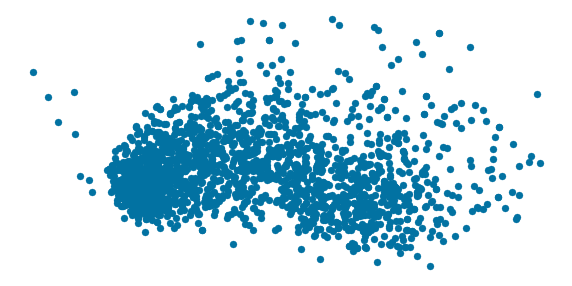

In [32]:
# this PCA mainly generated for 2-D visualization 
pca_vis = PCA(n_components=2)
pca_vis_df = pca_vis.fit_transform(df_scl)
plt_dim_redc(pca_vis_df)

# Looks like the data is not well-separated 

In [33]:
# THis PCA is tested for input of cluster

pca = PCA()
pca_df = pca.fit_transform(df_scl)

In [34]:
pca_df

array([[ 3.87243346e+00,  6.74057003e-01, -1.37962988e+00, ...,
        -8.40588157e-01,  2.02482306e-01,  1.14435953e-01],
       [-2.44418718e+00, -7.06919207e-01,  5.98419574e-01, ...,
        -1.39713903e-01, -5.72766741e-02, -6.62895459e-02],
       [ 1.67314082e+00, -8.30104876e-01, -8.12514194e-01, ...,
        -5.52778672e-04, -1.96157599e-01, -4.11040766e-01],
       ...,
       [ 1.47768290e+00,  3.04480559e-01,  1.04739061e+00, ...,
         9.79558917e-03, -5.20918035e-02, -1.53432465e-01],
       [ 1.57534224e+00, -5.38223234e-01, -9.44674637e-01, ...,
        -2.24819523e-01,  3.81099851e-01, -4.15305377e-02],
       [-1.59061661e+00,  1.95878463e+00,  2.62986526e-02, ...,
         1.60594488e-01,  1.43444805e-01, -3.58983634e-01]])

In [35]:
#print out the explained variance 
pca.explained_variance_ratio_

array([0.26532193, 0.07988992, 0.07386288, 0.06115749, 0.04778282,
       0.04097229, 0.04038469, 0.0400562 , 0.0368942 , 0.03350118,
       0.03309229, 0.02915696, 0.02714935, 0.0243582 , 0.02313331,
       0.02215238, 0.02022463, 0.01763148, 0.01698402, 0.01557839,
       0.01508574, 0.01150587, 0.00949592, 0.00815795, 0.00646993])

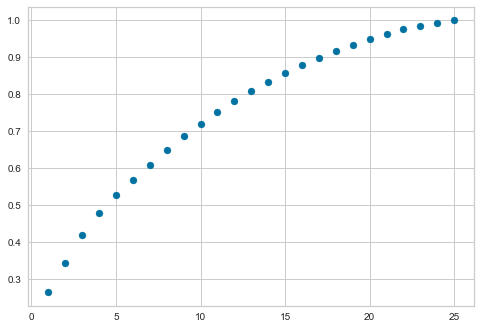

In [36]:
#plot the increased of explained variance VS. increased components
plt.scatter(np.arange(1, 26, 1), pca.explained_variance_ratio_.cumsum())

In [37]:
#As expected, with increasing the components, the explained variance increases as well
#using 13 components, the explained variance is about 0.8;
#using 18 components, the explained variance is about 0.9

#Here, we will choose 13 PCA component, it can explain 0.8 of the variance, should be enough for clustering and can reduce the 
#cost of computation

In [38]:
pca_n13 = PCA(n_components=13)
pca_n13_df = pca_n13.fit_transform(df_scl)
pca_n13_df.shape

(2212, 13)

## (2) t-SNE

In [39]:
# t-SNE mainly generated for 2-D visualization, so we will use n_component=2
tsne_vis = TSNE(n_components=2, perplexity=40, n_iter=600, init='pca')
tsne_vis_df = tsne_vis.fit_transform(df_scl)

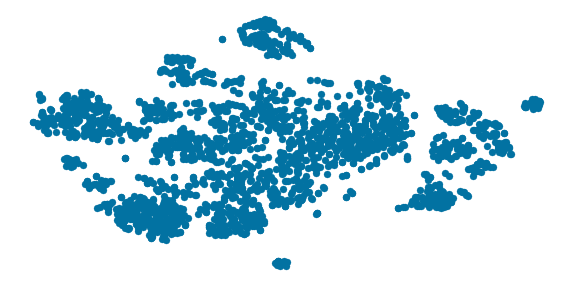

In [40]:
plt_dim_redc(tsne_vis_df)

#Looks better than PCA, let's fine-tuning the paramter a bit

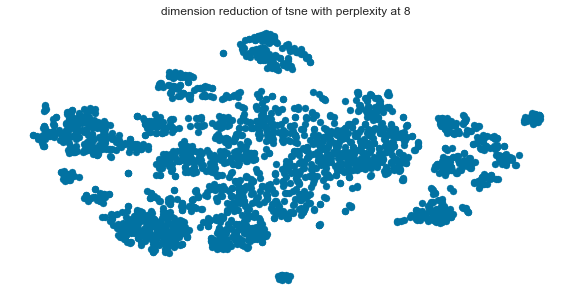

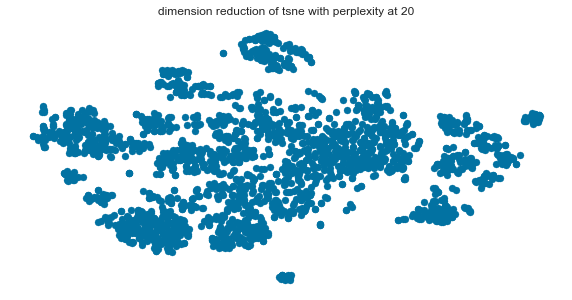

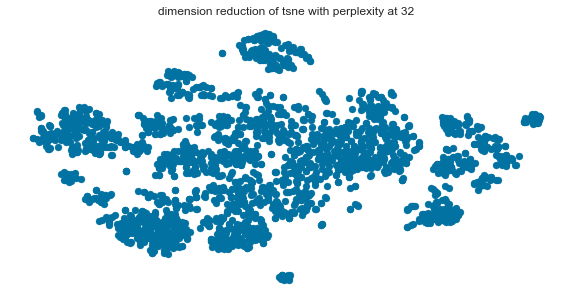

In [125]:
# Let's do some hyperparameter tuning to see if we can get better 2-D visualization

for i in np.arange(8, 43, 12):
    tsne_vis_dftmp = TSNE(n_components=2, perplexity=40, n_iter=600, init='pca').fit_transform(df_scl)
    plt_dim_redc(tsne_vis_dftmp)
    plt.title('dimension reduction of tsne with perplexity at {}'.format(i))

In [42]:
# Overall, different perplexity for t-SNE is not that different. we will pick perplexity = 32 for now
tsne_vis = TSNE(n_components=2, perplexity=32, n_iter=600, init='pca')
tsne_vis_df = tsne_vis.fit_transform(df_scl)

### (3) UMAP

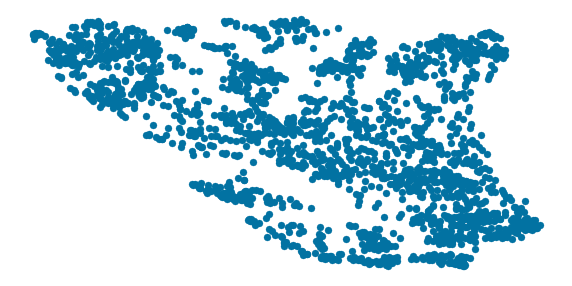

In [43]:
# UMAP is also mainly generated for 2-D visualization, so n_component is fixed to 2
# Initial UMAP 
umap_vis = umap.UMAP(n_components=2, n_neighbors=80, min_dist=0.1, metric='manhattan')
umap_vis_df = umap_vis.fit_transform(df_scl)
plt_dim_redc(umap_vis_df)

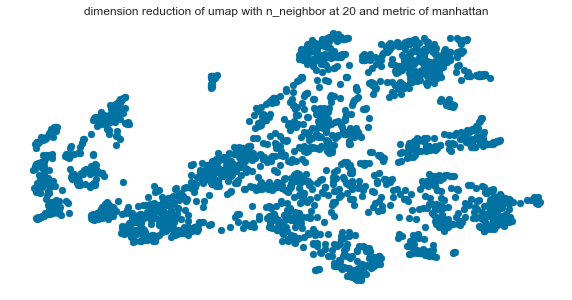

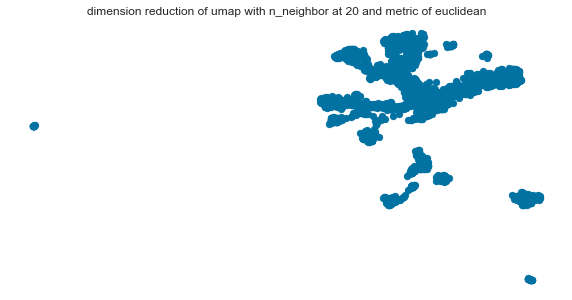

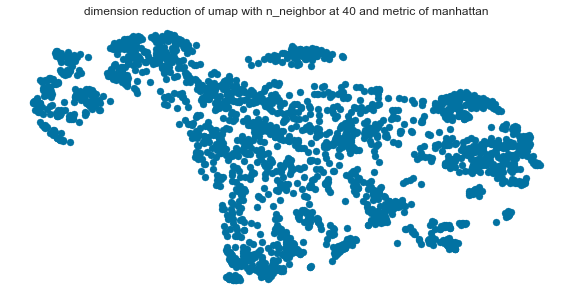

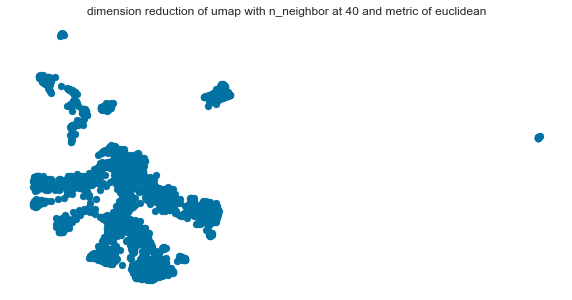

In [126]:
# Let's do some hyperparameter tuning to see if we can get better 2-D visualization
for i in np.arange(20, 50, 20):
    for j in ['manhattan', 'euclidean']:
        umap_vis_df_tmp = umap.UMAP(n_components=2, n_neighbors=i, metric=j).fit_transform(df_scl)
        plt_dim_redc(umap_vis_df_tmp)
        plt.title('dimension reduction of umap with n_neighbor at {} and metric of {}'.format(i, j))

In [45]:
# Looks like the UMAP method is very sensitive to the metrics. Also, the higher "n_neighbors" the output is more focus on global
# trend. Here, we will pick n_component = 40, metric = manhattan for 2-D visualization method evaluation
umap_vis = umap.UMAP(n_components=2, n_neighbors=40, metric='manhattan')
umap_vis_df = umap_vis.fit_transform(df_scl)

## (4) Dimensionality evaluation

In [46]:
#(1) For clustering input, we will use PCA output with n_component = 13. The reason we pick this one is because with n_component = 13,
# 80% of variance can be explained 
#(2) For 2-D visualization, we tested PCA / t-SNE / UMAP. Overall, t-SNE is more reasonable as the observations are separated, 
# and the density is reasonable. So we will use t-SNE for 2-D visualization

# 6. Clustering

## (1) Kmeans 
## (2) Agglormerative method
## (3) DBSCAN
## (4) Gassian mixture model

In [47]:
# Let's first define a 2-D visualization function and print out the Silhouette function:
def plt_opt(predic, vis):
    plt.figure(figsize=(10,5))
    colours = np.array(['r', 'b', 'g', 'c', 'm', 'y'])
    plt.scatter(vis[:, 0], vis[:, 1], c=colours[predic])

    plt.xticks([])
    plt.yticks([])
    plt.axis('off')
    plt.show()

def silscore_print(inp, label):
    print("the Silhouette score is {}". format(metrics.silhouette_score(inp, label, metric='euclidean')))

In [48]:
# Let's define a Silhouette Score DataFrame
sil_score_df = pd.DataFrame(columns=['Silhouette score'], dtype='float')

## (1) K-means

In [49]:
# First we need to decide what is the optimal cluster number using elbow method

In [50]:
# Let's generate total accepted campaign and total amount spent on goods
df_scl_df = pd.DataFrame(df_scl, columns=df1.columns)

df_scl_df['tot_acceptedcmp'] = df_scl_df['AcceptedCmp3'] + df_scl_df['AcceptedCmp1'] + df_scl_df['AcceptedCmp2'] + df_scl_df['AcceptedCmp4'] + df_scl_df['AcceptedCmp5']
df_scl_df['tot_mnt'] = df_scl_df['MntWines'] + df_scl_df['MntFruits'] + df_scl_df['MntMeatProducts'] + df_scl_df['MntFishProducts'] + df_scl_df['MntSweetProducts'] + df_scl_df['MntGoldProds'] 

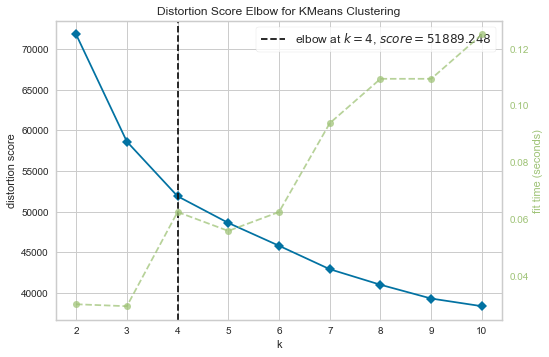

In [51]:
elbow = KElbowVisualizer(KMeans(), k=10)
elbow.fit(df_scl_df)
elbow.show()
plt.show()

In [52]:
#The best cluster number is 4, and we will use cluster number = 4 in kmeans

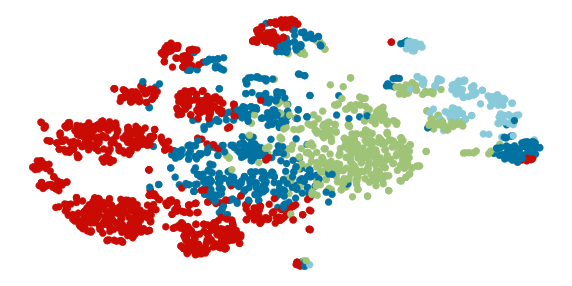

the Silhouette score is 0.197433442653238


In [183]:

# Let's create an inital kmeans clustering
kmeans_cluster = KMeans(n_clusters=4, random_state=243)
pred_kmeans = kmeans_cluster.fit_predict(pca_n13_df)
plt_opt(pred_kmeans, tsne_vis_df)
silscore_print(pca_n13_df, pred_kmeans)

In [184]:
# Let's see how many percentage belongs to each cluster
pd.DataFrame(pred_kmeans).value_counts()/len(pred_kmeans)*100

0    45.931284
1    24.954792
2    22.287523
3     6.826401
dtype: float64

In [139]:
# After some hyperparameter tuning, they are not that different. 

In [140]:

# we will write the first one into the Silhouette score DataFrame
results = metrics.silhouette_score(pca_n13_df, pred_kmeans, metric='euclidean')
sil_score_df.loc['k-means'] = results

In [155]:
# Let's see how many percentage belongs to each cluster
pd.DataFrame(pred_kmeans).value_counts()/len(pred_kmeans)*100

3    45.660036
0    25.090416
1    22.423146
2     6.826401
dtype: float64

## (2) Agglomerative clustering

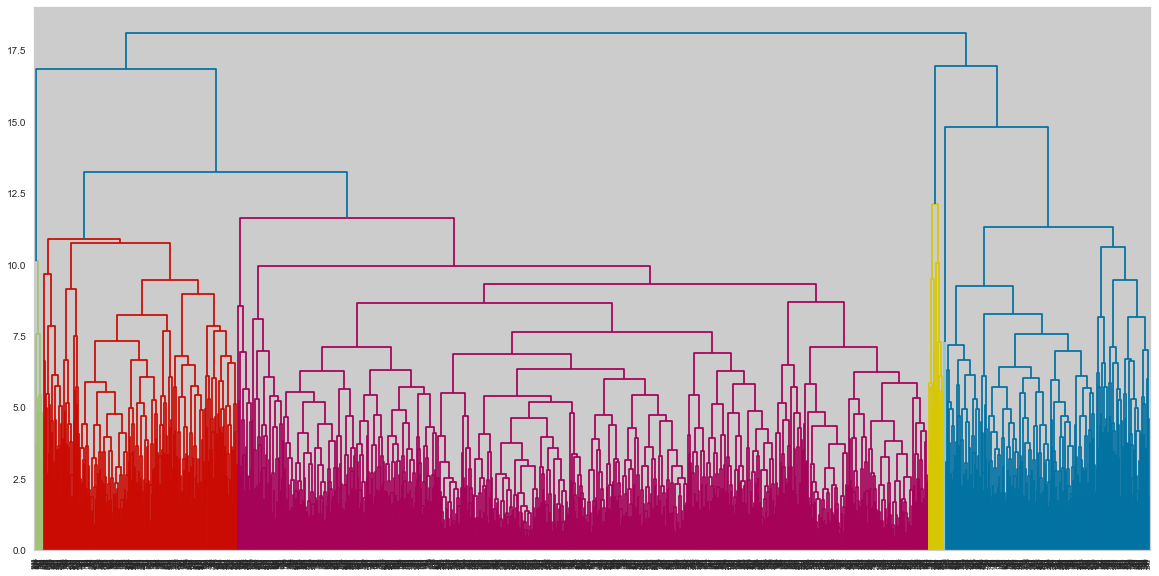

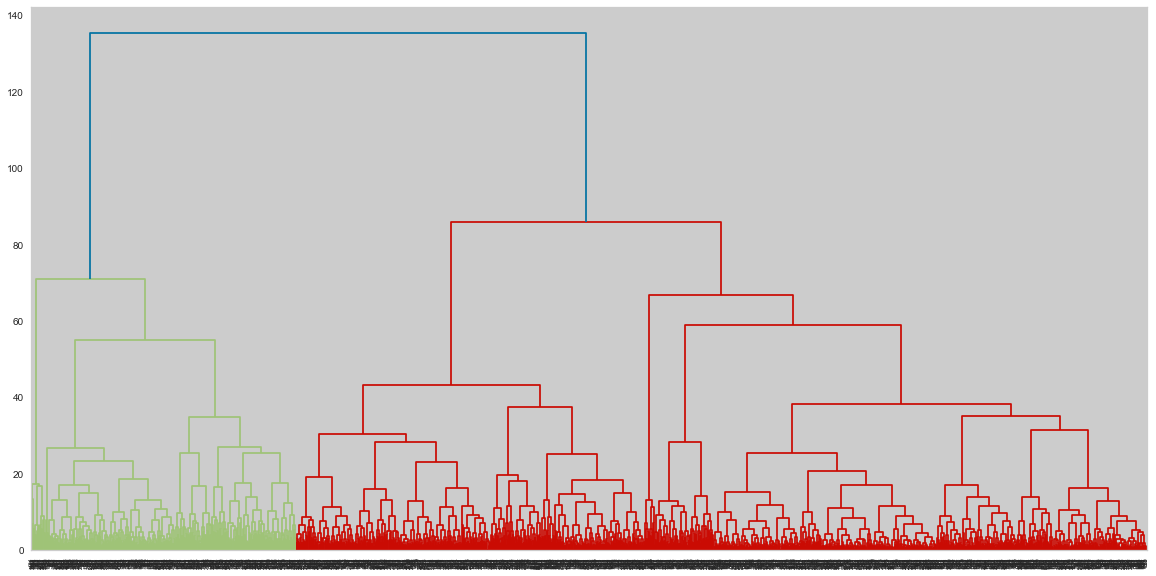

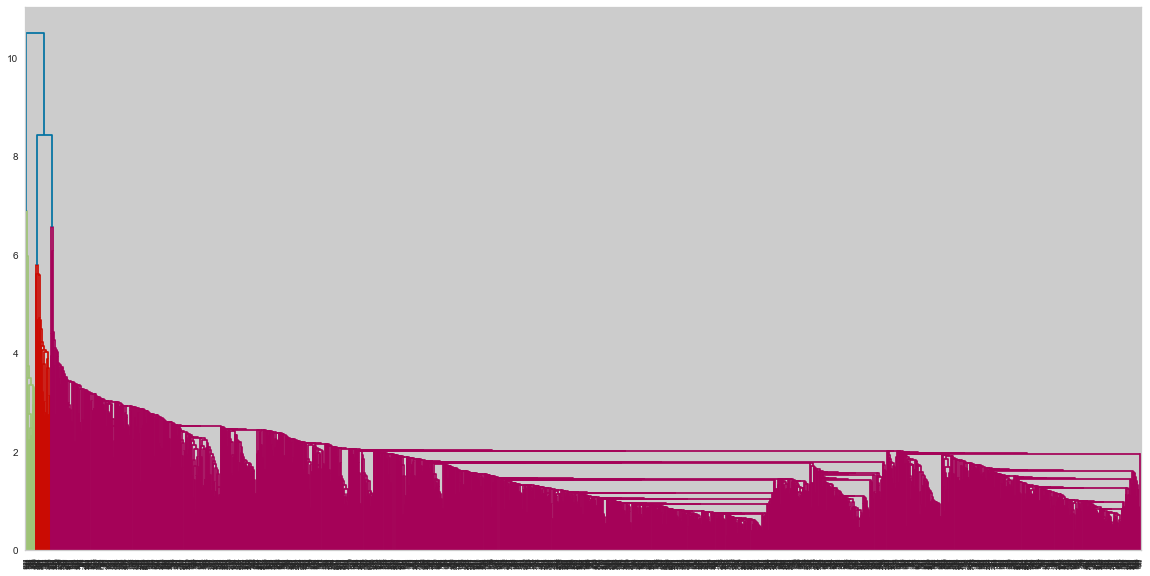

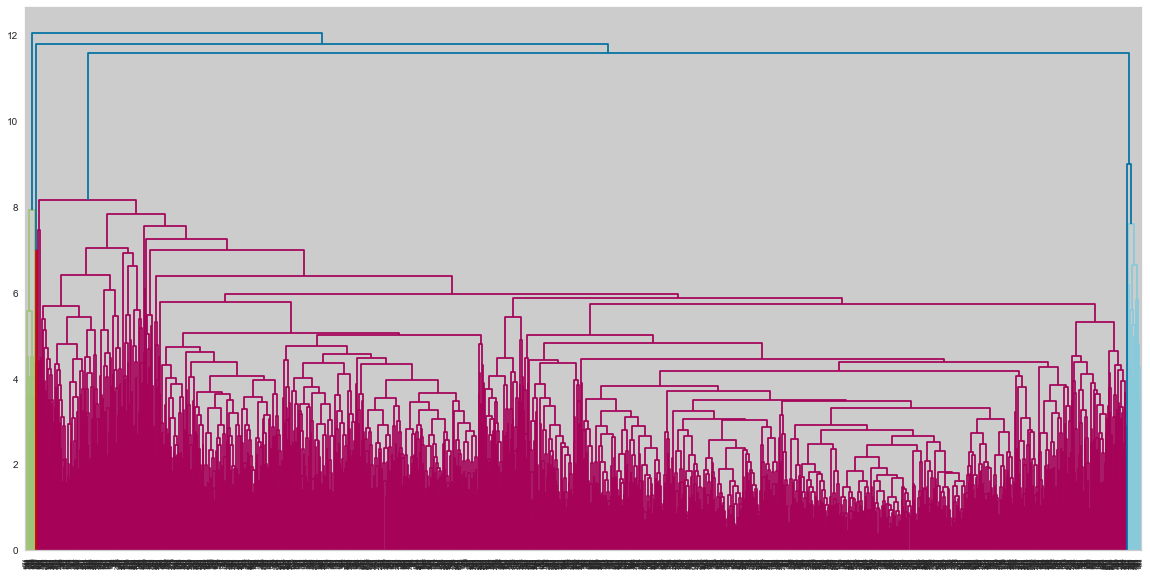

In [57]:
#plot the dendrogram, and we can use it to decide how many clusters we want to use
methods = ['complete', 'ward', 'single', 'average']
for meth in methods:
    plt.figure(figsize=(20,10))
    dendrogram(linkage(pca_n13_df, method=meth))
    plt.show()

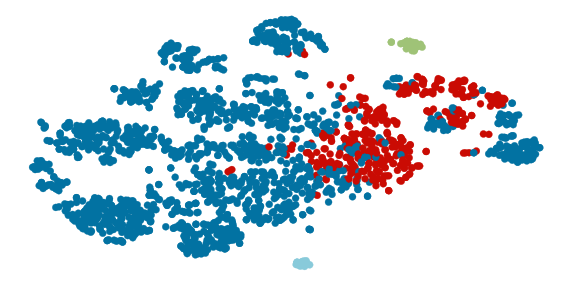

the Silhouette score is 0.2784222552026922


In [58]:
#Let's run agglomerative clustering using "complete" as linkage
agg_cluster = AgglomerativeClustering(linkage='complete', 
                                      n_clusters=4)
pred_agg = agg_cluster.fit_predict(pca_n13_df)

plt_opt(pred_agg, tsne_vis_df)
silscore_print(pca_n13_df, pred_agg)

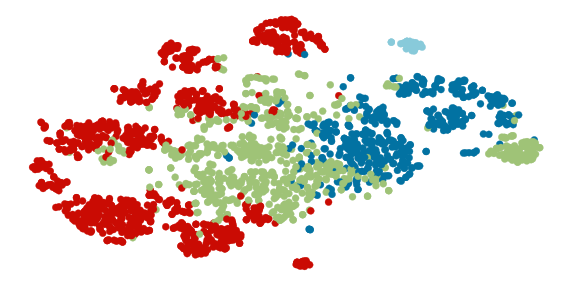

the Silhouette score is 0.15349547643452746


In [59]:
#Let's run some hyper parameter tuning, like run agglomerative clustering using "ward" as linkage
agg_cluster = AgglomerativeClustering(linkage='ward', 
                                      n_clusters=4)
pred_agg_tmp = agg_cluster.fit_predict(pca_n13_df)

plt_opt(pred_agg_tmp, tsne_vis_df)
silscore_print(pca_n13_df, pred_agg_tmp)

In [60]:
pd.DataFrame(pred_agg).value_counts()/len(pred_agg)

1    0.792948
0    0.184448
2    0.013562
3    0.009042
dtype: float64

In [61]:
# We will pick the one using linkage as"complete", as it has higher Silhouette score


In [62]:
# Write output into the Silhouette score DataFrame
results = metrics.silhouette_score(pca_n13_df, pred_agg, metric='euclidean')
sil_score_df.loc['agglomerative'] = results

In [142]:
# Let's see how many percentage belongs to each cluster
pd.DataFrame(pred_agg).value_counts()/len(pred_agg)*100

1    79.294756
0    18.444846
2     1.356239
3     0.904159
dtype: float64

## (3) DBSCAN

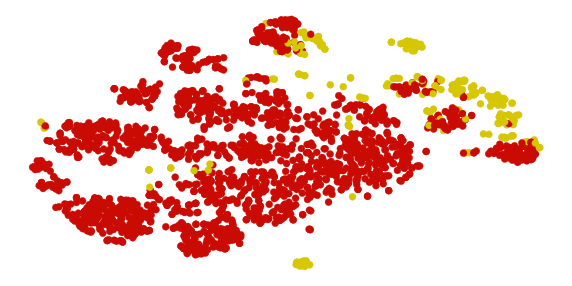

the Silhouette score is 0.34862084991435244


In [132]:
# Let's get an initial DBSCAN model
dbscan_cluster = DBSCAN(eps=3, min_samples=10)
pred_db = dbscan_cluster.fit_predict(pca_n13_df)
plt_opt(pred_db, tsne_vis_df)
silscore_print(pca_n13_df, pred_db)

In [64]:
# it seems there are only two clusters, one of them have much more observations than the other

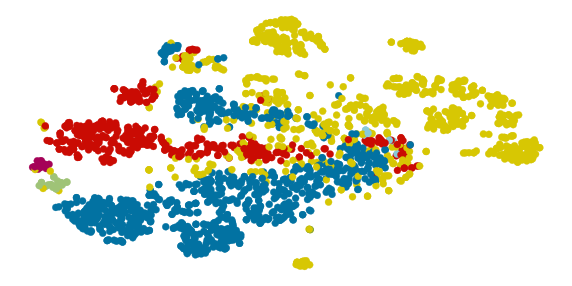

the Silhouette score is -0.1011695388931134


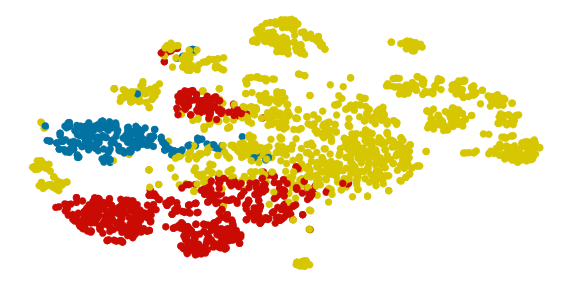

the Silhouette score is 0.0029352136414895705


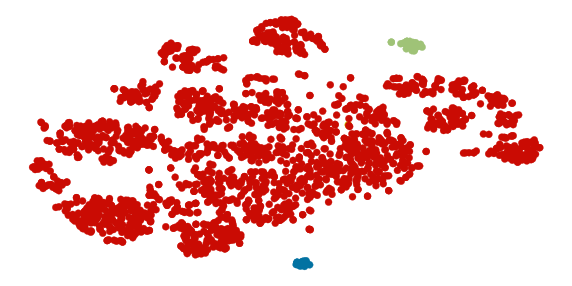

the Silhouette score is 0.4940794488674883


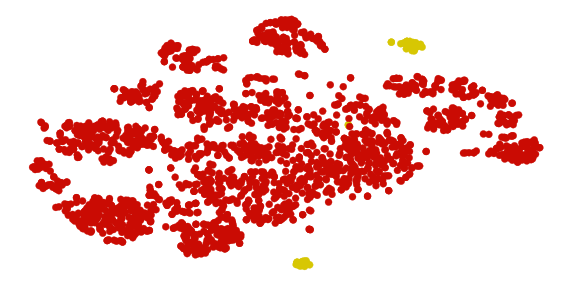

the Silhouette score is 0.5104511703458505


In [136]:
#Let's tuning the hyper parameter
for epsvalue in np.arange(2, 8, 5):
    for min_s in np.arange(10, 40, 20):
        dbscan_cluster = DBSCAN(eps=epsvalue, min_samples=min_s)
        pred_db = dbscan_cluster.fit_predict(pca_n13_df)
        plt_opt(pred_db, tsne_vis_df)
       # plt.title('eps is {} and min_sample is {}'.format(epsvalue, min_s))
        silscore_print(pca_n13_df, pred_db)
        
# it seems that DBSCAN is not working well for this case, as the Silhouette score is either negative, or when the Silhouette 
#is higher, there is mainly one cluster (the other cluster have very few observations)

# So we will not include this method in the models evaluation part

In [66]:
# it seems that DBSCAN is not working well for this case, as the Silhouette score is either negative, or when the Silhouette 
#is higher, there is mainly one cluster (the other cluster have very few observations)

# So we will not include this method in the models evaluation part

In [67]:
pd.DataFrame(pred_db).value_counts()

 0    2162
 1      30
-1      20
dtype: int64

## (4) Gaussian Mixture Model

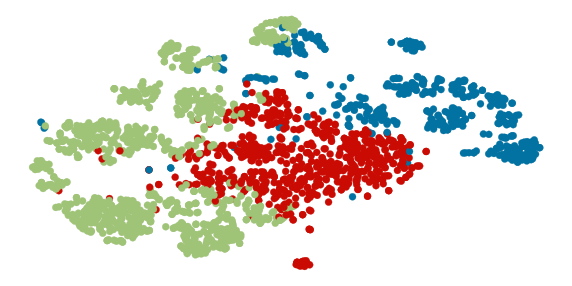

the Silhouette score is 0.19013101633472326


In [145]:
# Let's get an initial Gaussian Mixture model
gmm_cluster = GaussianMixture(n_components=3, init_params='kmeans', random_state=123)
pred_gmm = gmm_cluster.fit_predict(pca_n13_df)
plt_opt(pred_gmm, tsne_vis_df)
silscore_print(pca_n13_df, pred_gmm)

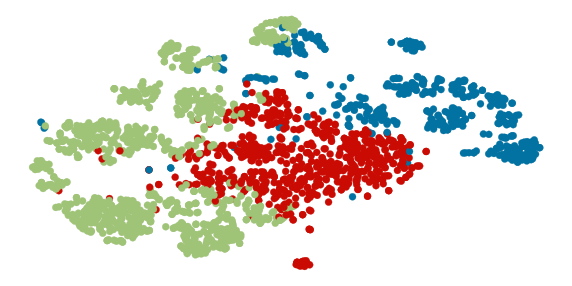

the Silhouette score is 0.19013101633472326


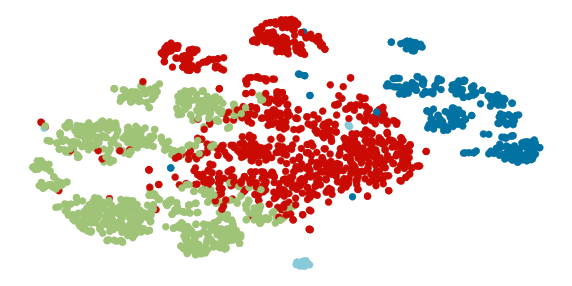

the Silhouette score is 0.16910082536778423


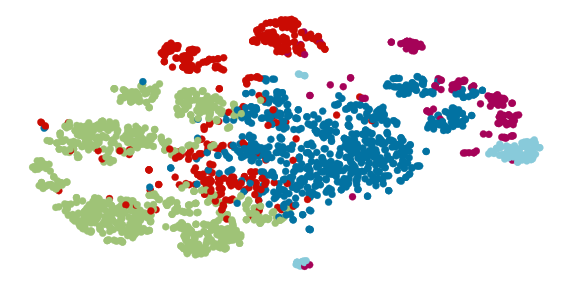

the Silhouette score is 0.16370742276604666


In [146]:
# Let's tuning the hyper parameters
for i in [3, 4, 5]:
    gmm_cluster = GaussianMixture(n_components=i, init_params='kmeans', covariance_type='full', random_state=123)
    pred_gmm_tmp = gmm_cluster.fit_predict(pca_n13_df)
    plt_opt(pred_gmm_tmp, tsne_vis_df)
    silscore_print(pca_n13_df, pred_gmm_tmp)

In [70]:
# Looks like n_component = 3 has slightly higher Silhouette scores, and we will pick this one for Gaussian model

In [147]:
# Let's see how many percentage belongs to each cluster
pd.DataFrame(pred_gmm).value_counts()/len(pred_gmm)*100

2    47.287523
0    31.103074
1    21.609403
dtype: float64

In [144]:
# Write output into the Silhouette score DataFrame
results = metrics.silhouette_score(pca_n13_df, pred_gmm, metric='euclidean')
sil_score_df.loc['Gaussian mixture model'] = results

# 7. Model evaluation

## Comparison three different models:
## (1) K-means (2) Agglomerative model (3) Gaussian mixuture model
## Method: 
## (1) Sihouette score (2) visualization (3) Cluster distribution analysis

## (1) Comparison of Silhouette score

In [91]:
#Let's first compare the Silhouette score
sil_score_df

,Silhouette score
k-means,0.197179
agglomerative,0.278422
Gaussian mixture model,0.163707


In [92]:
#From here, looks like the agglomerative model has the highest score, while k-means and Gaussian mixture model is close

## (2) 2-D visualization

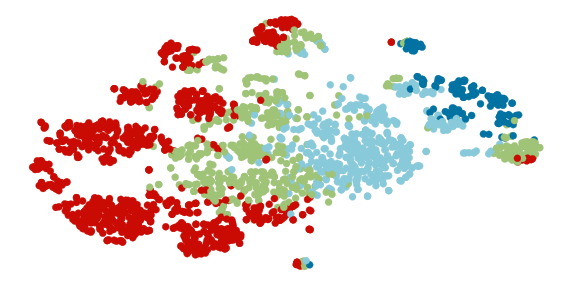

In [93]:
# 2-D visualization for K-means
plt_opt(pred_kmeans, tsne_vis_df)

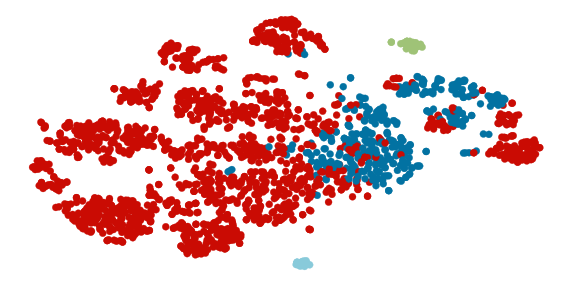

In [94]:
# 2-D visualization for Agglomerative model
pred_agg_up = []
for i in pred_agg:
    if i == 1:
        pred_agg_up.append(0)
    elif i == 0:
        pred_agg_up.append(1)
    elif i == 2:
        pred_agg_up.append(2)
    else:
        pred_agg_up.append(3)
pred_agg_up = np.array(pred_agg_up)

plt_opt(pred_agg_up, tsne_vis_df)

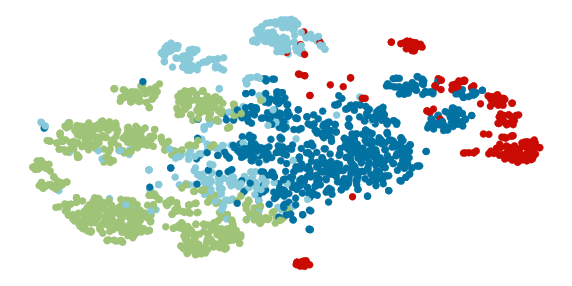

In [95]:
# 2-D visualization for Gaussian mixture model
pred_gmm_up = []
for i in pred_gmm:
    if i == 2:
        pred_gmm_up.append(2)
    elif i == 0:
        pred_gmm_up.append(3)
    elif i == 1:
        pred_gmm_up.append(1)
    else:
        pred_gmm_up.append(0)
pred_gmm_up = np.array(pred_gmm_up)
plt_opt(pred_gmm_up, tsne_vis_df)

From the visualization, some observations:
(1) none of them is perfect, all of them have some overlapping among different clusters
(2) Looks like the k-means is more reasonable as we can observe the trend of different clusters even though it's not a clean separation

Let's evaluate those three models by checking the mean/distribution of different clusters

In [96]:
# Combine the three labels into one dataset
df_cmb = df1.copy()

df_cmb['Tot_acceptedcmp'] = df_cmb['AcceptedCmp3'] + df_cmb['AcceptedCmp1'] + df_cmb['AcceptedCmp2'] + df_cmb['AcceptedCmp4'] + df_cmb['AcceptedCmp5']
df_cmb['Tot_mnt'] = df_cmb['MntWines'] + df_cmb['MntFruits'] + df_cmb['MntMeatProducts'] + df_cmb['MntFishProducts'] + df_cmb['MntSweetProducts'] + df_cmb['MntGoldProds']
df_cmb['Tot_num'] = df_cmb['NumDealsPurchases'] + df_cmb['NumWebPurchases'] + df_cmb['NumCatalogPurchases'] + df_cmb['NumStorePurchases'] + df_cmb['NumWebVisitsMonth']

df_cmb['Kmeans_label'] = pred_kmeans
df_cmb['Agg_label'] = pred_agg_up
df_cmb['Gmm_label'] = pred_gmm_up

In [97]:
df_cmb.columns

Index(['Education', 'Marital_Status', 'Income', 'Recency', 'MntWines',
       'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Response', 'Age', 'Len_Customer',
       'Children', 'Tot_acceptedcmp', 'Tot_mnt', 'Tot_num', 'Kmeans_label',
       'Agg_label', 'Gmm_label'],
      dtype='object')

In [98]:
plt_list = ['Education', 'Marital_Status', 'Income', 'Recency', 'Complain', 'Response', 'Age', 'Len_Customer',
       'Children', 'Tot_acceptedcmp', 'Tot_mnt', 'Tot_num', 'Kmeans_label',
       'Agg_label', 'Gmm_label']

In [99]:
df_cmb

,Education,Marital_Status,Income,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,Response,Age,Len_Customer,Children,Tot_acceptedcmp,Tot_mnt,Tot_num,Kmeans_label,Agg_label,Gmm_label
0,1,0,58138.0,58,635,88,546,172,88,88,...,1,65,3666,0,0,1617,32,3,1,1
1,1,0,46344.0,38,11,1,6,2,1,6,...,0,68,2820,2,0,27,11,0,0,2
2,1,1,71613.0,26,426,49,127,111,21,42,...,0,57,3167,0,0,776,25,3,0,1
3,1,1,26646.0,26,11,4,20,10,3,5,...,0,38,2760,1,0,53,14,0,0,2
4,2,1,58293.0,94,173,43,118,46,27,15,...,0,41,3016,1,0,422,24,2,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,1,1,61223.0,46,709,43,182,42,118,247,...,0,55,3236,1,0,1341,23,3,1,1
2236,2,1,64014.0,56,406,0,30,0,0,8,...,0,76,2756,3,1,444,29,2,0,1
2237,1,0,56981.0,91,908,48,217,32,12,24,...,0,41,3010,0,1,1241,25,2,0,0
2238,1,1,69245.0,8,428,30,214,80,30,61,...,0,66,3011,1,0,843,26,3,0,1


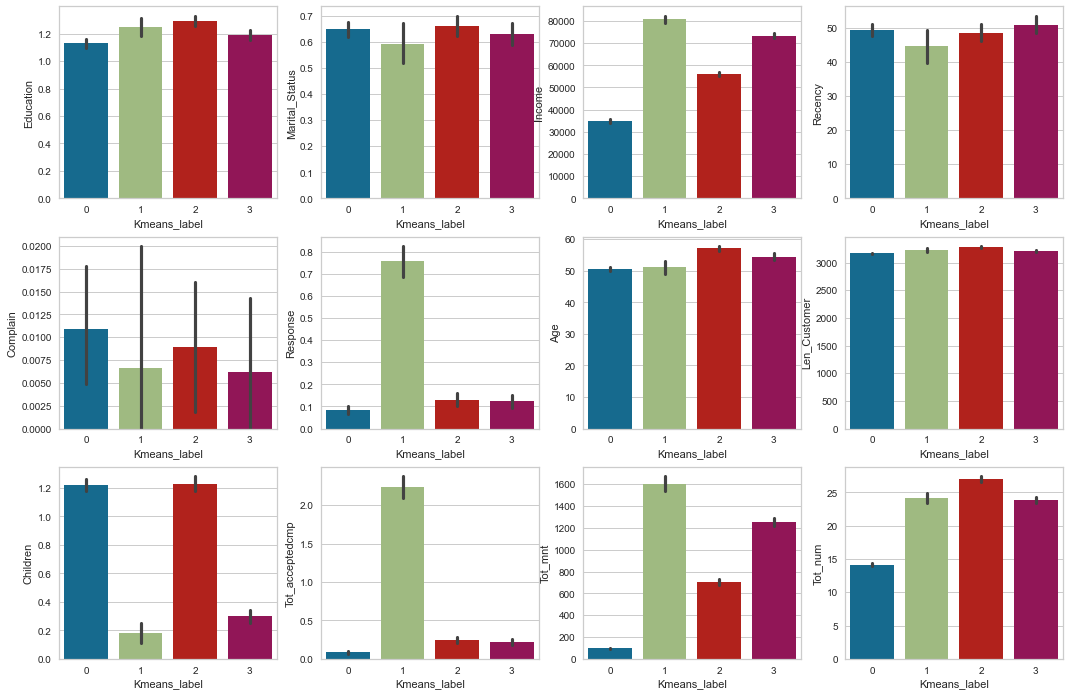

In [100]:
# K-means model: Means of different clusters for each features 
fig = plt.figure(figsize=(18, 12))
for i in range(len(plt_list[0:-3])):
    ax = fig.add_subplot(3, 4, i+1)
    sns.barplot(x='Kmeans_label', y=plt_list[i], data=df_cmb)                                

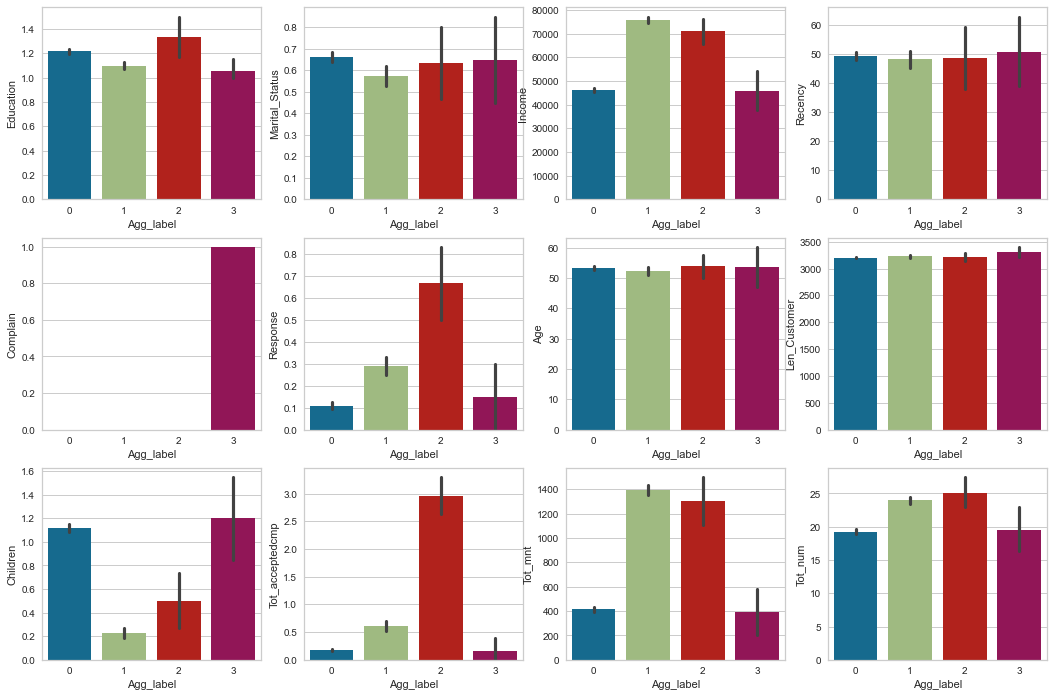

In [101]:
# Agglomerative model: Means of different clusters for each features 
fig = plt.figure(figsize=(18, 12))
for i in range(len(plt_list[0:-3])):
    ax = fig.add_subplot(3, 4, i+1)
    sns.barplot(x='Agg_label', y=plt_list[i], data=df_cmb)    

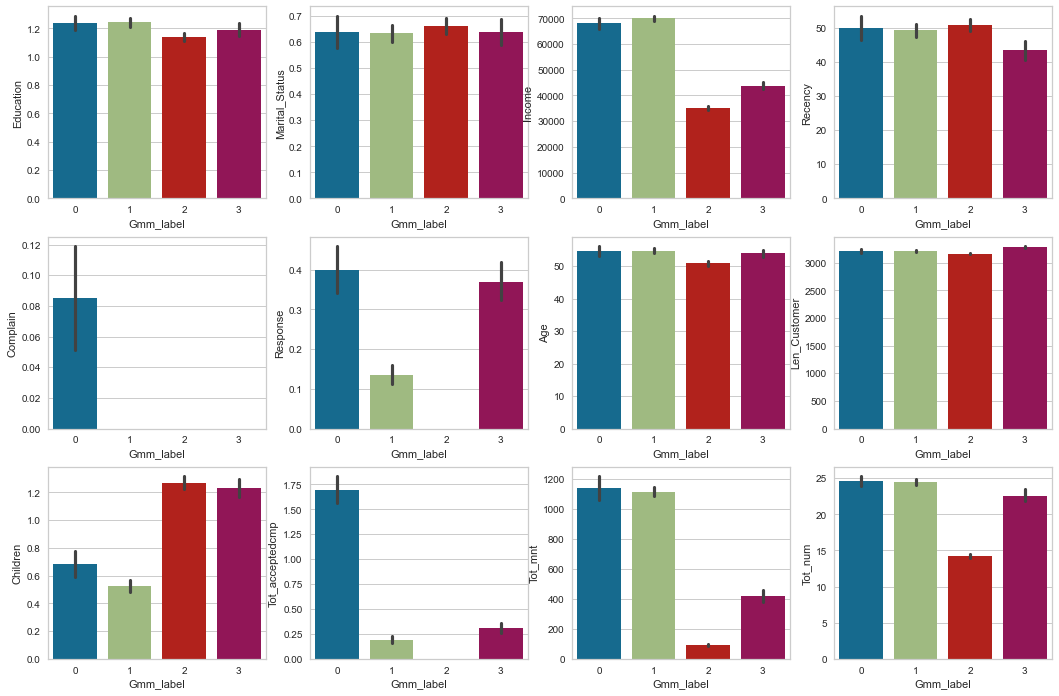

In [102]:
# Gaussian mixture model: Means of different clusters for each features 
fig = plt.figure(figsize=(18, 12))
for i in range(len(plt_list[0:-3])):
    ax = fig.add_subplot(3, 4, i+1)
    sns.barplot(x='Gmm_label', y=plt_list[i], data=df_cmb)    

Text(0.5, 1.0, 'Percentage of customers in each cluster: Gaussian mixture model')

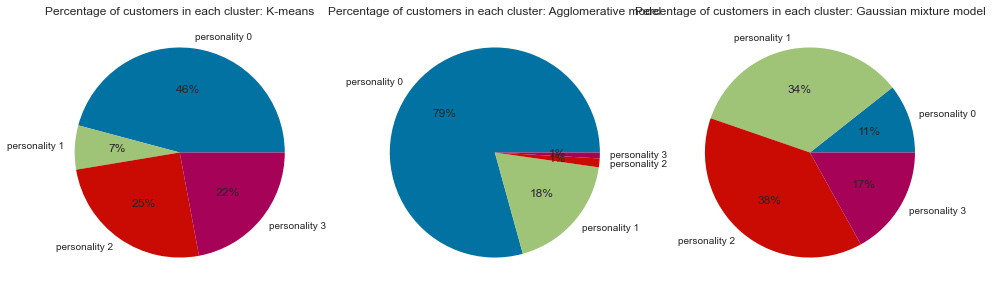

In [103]:
# Percentage of different clusters for K-means, agglomerative model, and Gaussian mixture model

labels = ['personality 0', 'personality 1', 'personality 2', 'personality 3']
fig=plt.figure(figsize=(16, 8))
ax = fig.add_subplot(1, 3, 1)
plt.pie(df_cmb.groupby(by='Kmeans_label')['Income'].count().values, 
        labels=labels, autopct='%.0f%%')
plt.title('Percentage of customers in each cluster: K-means')
ax = fig.add_subplot(1, 3, 2)
plt.pie(df_cmb.groupby(by='Agg_label')['Income'].count().values, 
        labels=labels, autopct='%.0f%%')
plt.title('Percentage of customers in each cluster: Agglomerative model')
ax = fig.add_subplot(1, 3, 3)
plt.pie(df_cmb.groupby(by='Gmm_label')['Income'].count().values, 
        labels=labels, autopct='%.0f%%')
plt.title('Percentage of customers in each cluster: Gaussian mixture model')

In [104]:
# From the above analysis, even though the Agglomerative model has slightly higher Silhouette score, however, K-means is more
# reasonable to separate into different cluster. The percentage of people in each cluster is also more reasonable

# So we pick K-means as our winner, and use it for customer segmentation analysis

# 8. Data analysis
## 8.1 Demographics
## 8.2 Bussiness related
## 8.3 Response to campaign

In [105]:
df1.columns

Index(['Education', 'Marital_Status', 'Income', 'Recency', 'MntWines',
       'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Response', 'Age', 'Len_Customer',
       'Children'],
      dtype='object')

 If we take a look at the features, we can divided into several analysis groups:
1.  Demographics 
    Such as (1) age; (2) Education; (3) income; (4) Family info ('Marital_Status', 'Children')
2.  Bussiness related 
    Such as (1) purchase behavior ('MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds');  (2) where they purchase items ('NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth')
3.  Response to campaign
    such as ('AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1','AcceptedCmp2',)

In [106]:
personality_0 = df_cmb[df_cmb['Kmeans_label']==0]
personality_1 = df_cmb[df_cmb['Kmeans_label']==1]
personality_2 = df_cmb[df_cmb['Kmeans_label']==2]
personality_3 = df_cmb[df_cmb['Kmeans_label']==3]

## 8.1 Demographics

### 8.1.1 Age

<AxesSubplot:xlabel='Kmeans_label', ylabel='Age'>

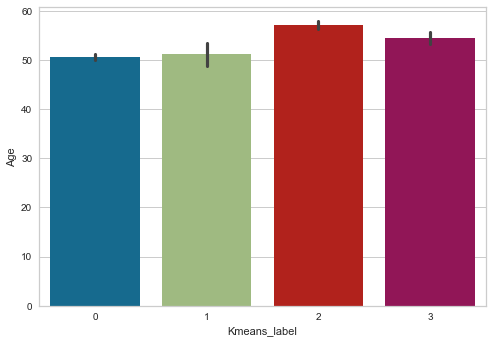

In [107]:
sns.barplot(x='Kmeans_label', y='Age', data=df_cmb)

(array([19., 34., 53., 62., 69., 62., 67., 69., 35., 18.]),
 array([27. , 32.4, 37.8, 43.2, 48.6, 54. , 59.4, 64.8, 70.2, 75.6, 81. ]),
 <BarContainer object of 10 artists>)

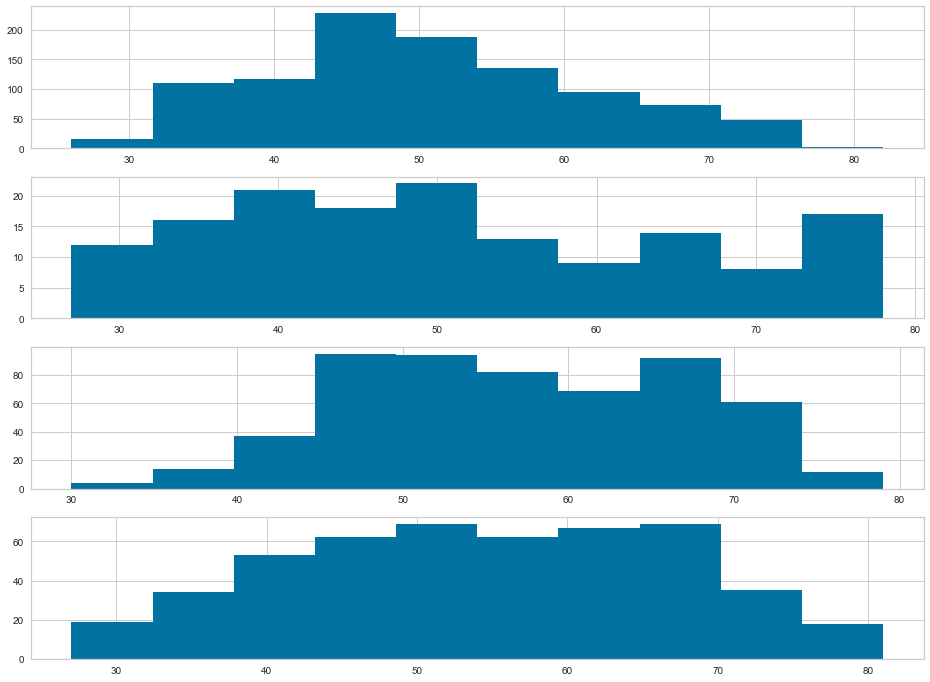

In [109]:
fig = plt.figure(figsize=(16, 12))
ax = fig.add_subplot(4, 1, 1)
plt.hist(personality_0['Age'])
ax = fig.add_subplot(4, 1, 2)
plt.hist(personality_1['Age'])
ax = fig.add_subplot(4, 1, 3)
plt.hist(personality_2['Age'])
ax = fig.add_subplot(4, 1, 4)
plt.hist(personality_3['Age'])

Observations: 
Personality 1 have more people around 45-55
Personality 2 have more older people
Personality 3 slightly have more even distribution across different ages
Personality 4 have more younger people

### 8.1.2 Education

<AxesSubplot:xlabel='Kmeans_label', ylabel='Education'>

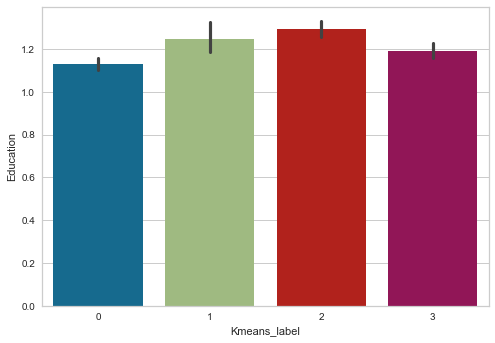

In [110]:
sns.barplot(x='Kmeans_label', y='Education', data=df_cmb)

(array([  1.,   0.,   0.,   0.,   0., 392.,   0.,   0.,   0.,  95.]),
 array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. ]),
 <BarContainer object of 10 artists>)

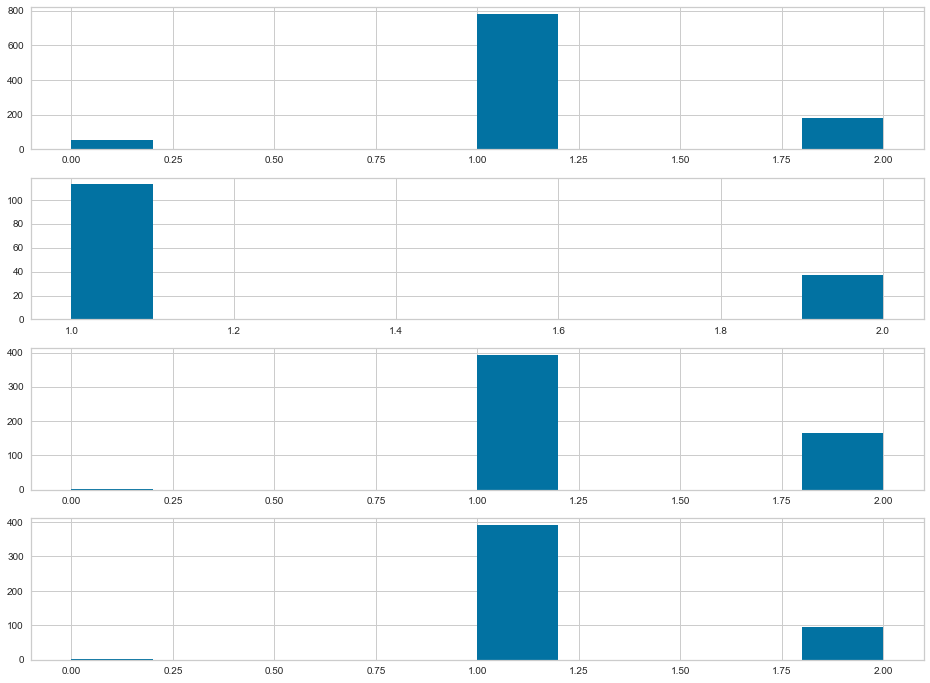

In [112]:
fig = plt.figure(figsize=(16, 12))
ax = fig.add_subplot(4, 1, 1)
plt.hist(personality_0['Education'])
ax = fig.add_subplot(4, 1, 2)
plt.hist(personality_1['Education'])
ax = fig.add_subplot(4, 1, 3)
plt.hist(personality_2['Education'])
ax = fig.add_subplot(4, 1, 4)
plt.hist(personality_3['Education'])

Observations: 
Personality 4 have most people with undergraduate education
Personality 1-3 have most people with graduate education 

### 8.1.3 Family members

<AxesSubplot:xlabel='Kmeans_label', ylabel='Children'>

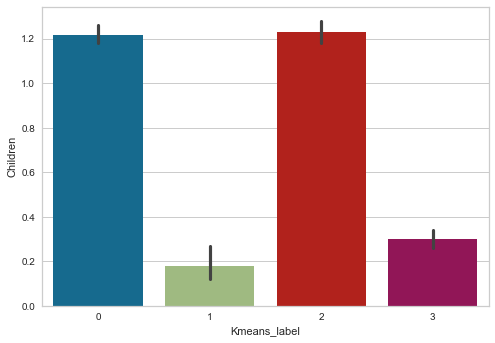

In [113]:
sns.barplot(x='Kmeans_label', y='Children', data=df_cmb)

<AxesSubplot:xlabel='Children', ylabel='Count'>

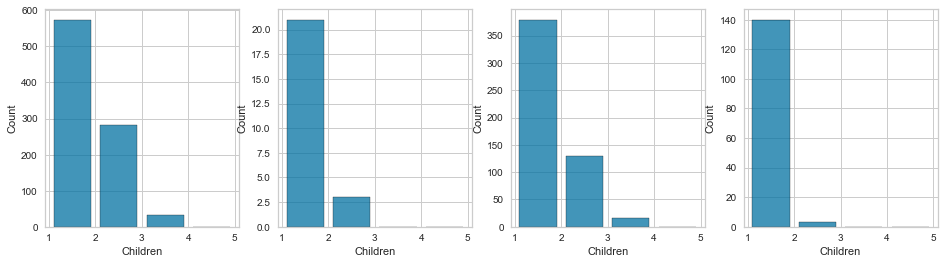

In [114]:
fig = plt.figure(figsize=(16, 4))
ax = fig.add_subplot(1, 4, 1)
sns.histplot(data=personality_0, x='Children', bins= list(range(1,6)), shrink= .8)
ax = fig.add_subplot(1, 4, 2)
sns.histplot(data=personality_1, x='Children', bins= list(range(1,6)), shrink= .8)
ax = fig.add_subplot(1, 4, 3)
sns.histplot(data=personality_2, x='Children', bins= list(range(1,6)), shrink= .8)
ax = fig.add_subplot(1, 4, 4)
sns.histplot(data=personality_3, x='Children', bins= list(range(1,6)), shrink= .8)

In [115]:
print("Single parent of personal 0 is {}".format((personality_0[personality_0.Children>0]['Marital_Status'] == 0).sum()/ personality_0.shape[0]*100))
print("Single parent of personal 1 is {}".format((personality_1[personality_1.Children>0]['Marital_Status'] == 0).sum()/ personality_1.shape[0]*100))
print("Single parent of personal 2 is {}".format((personality_2[personality_2.Children>0]['Marital_Status'] == 0).sum()/ personality_2.shape[0]*100))
print("Single parent of personal 3 is {}".format((personality_3[personality_3.Children>0]['Marital_Status'] == 0).sum()/ personality_3.shape[0]*100))

Single parent of personal 0 is 30.37475345167653
Single parent of personal 1 is 4.666666666666667
Single parent of personal 2 is 30.892857142857146
Single parent of personal 3 is 9.01639344262295


Observations:
(1) Personality 3 have least kids, mostly have 0-1 kids
(2) Personality 1 and 2 have most kids (1-3)
(3) Personality 1 and 2 both have 30% of them are single parent

### 8.1.4 Income

<AxesSubplot:xlabel='Kmeans_label', ylabel='Income'>

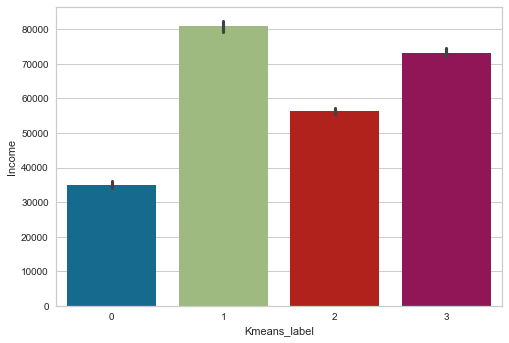

In [116]:
sns.barplot(x='Kmeans_label', y='Income', data=df_cmb)

<AxesSubplot:xlabel='Income', ylabel='Count'>

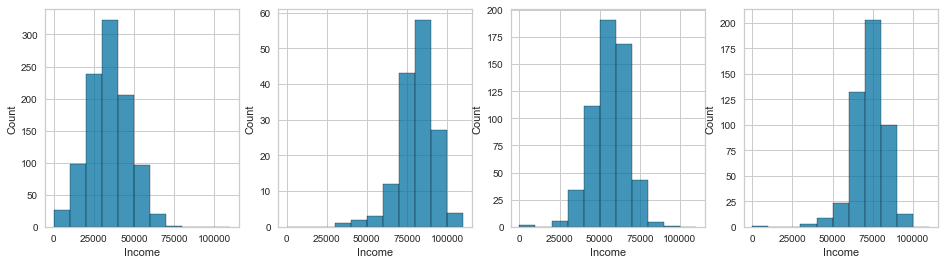

In [117]:
fig = plt.figure(figsize=(16, 4))
ax = fig.add_subplot(1, 4, 1)
sns.histplot(data=personality_0, x='Income', bins=np.arange(0,120000, 10000))
ax = fig.add_subplot(1, 4, 2)
sns.histplot(data=personality_1, x='Income', bins=np.arange(0,120000, 10000))
ax = fig.add_subplot(1, 4, 3)
sns.histplot(data=personality_2, x='Income', bins=np.arange(0,120000, 10000))
ax = fig.add_subplot(1, 4, 4)
sns.histplot(data=personality_3, x='Income', bins=np.arange(0,120000, 10000))

Observations:
Personality 1 have the lowest average income, followed by personality 2 and 3
Personality 4 have the highest average income

## 8.2 Bussiness related

### 8.2.1 Purchase products

In [118]:
def pur_personality(pur_per_df, per):
    pur_per_df = pd.DataFrame(columns=['amount'])
    pur_per_df.loc['MntWines'] = per['MntWines'].sum()
    pur_per_df.loc['MntFruits'] = per['MntFruits'].sum()
    pur_per_df.loc['MntMeatProducts'] = per['MntMeatProducts'].sum()
    pur_per_df.loc['MntFishProducts'] = per['MntFishProducts'].sum()
    pur_per_df.loc['MntSweetProducts'] = per['MntSweetProducts'].sum()
    pur_per_df.loc['MntGoldProds'] = per['MntGoldProds'].sum()
    return pur_per_df

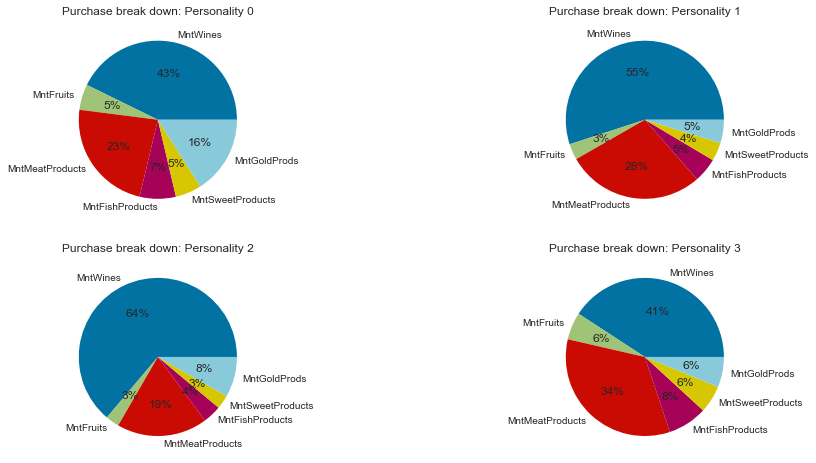

In [119]:
fig=plt.figure(figsize=(16, 8))
pur_p1 = pd.DataFrame(columns=['Num'])
pur_p2 = pd.DataFrame(columns=['Num'])
pur_p3 = pd.DataFrame(columns=['Num'])
pur_p4 = pd.DataFrame(columns=['Num'])

purs = [pur_p1, pur_p2, pur_p3, pur_p4]
pers = [personality_0, personality_1, personality_2, personality_3]

count = 0
for pur, per in zip(purs, pers):
    ax = fig.add_subplot(2, 2, count+1)
    pur = pur_personality(pur, per)
    plt.pie(pur['amount'], labels=pur.index, autopct='%.0f%%')
    plt.title('Purchase break down: Personality {}'.format(count))
    count = count + 1

Observations:
(1) Personality 1 buy highest amount for wines
(2) Personality 2 buy highest percentage of the meat/fish among all the clusters

### 8.2.2 Total spending

Let's check the total spending

In [120]:
df_cmb.columns

Index(['Education', 'Marital_Status', 'Income', 'Recency', 'MntWines',
       'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Response', 'Age', 'Len_Customer',
       'Children', 'Tot_acceptedcmp', 'Tot_mnt', 'Tot_num', 'Kmeans_label',
       'Agg_label', 'Gmm_label'],
      dtype='object')

<AxesSubplot:xlabel='Kmeans_label', ylabel='Tot_mnt'>

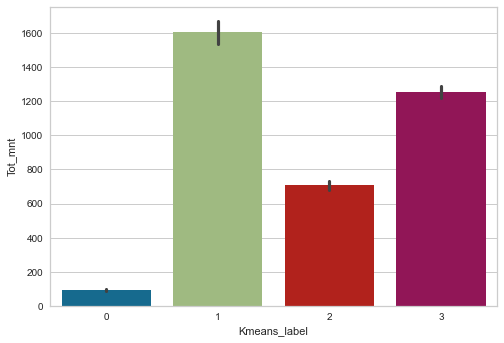

In [121]:
sns.barplot(x='Kmeans_label', y='Tot_mnt', data=df_cmb)

Observations:
Personality 1 have the lowest average spending, followed by personality 2 and 3
Personality 4 have the highest average spending

### 8.2.3 Places to Purchase

In [122]:
def num_personality(num_per_df, per):
    num_per_df = pd.DataFrame(columns=['Num'])
    num_per_df.loc['NumDealsPurchases'] = per['NumDealsPurchases'].sum()
    num_per_df.loc['NumWebPurchases'] = per['NumWebPurchases'].sum()
    num_per_df.loc['NumCatalogPurchases'] = per['NumCatalogPurchases'].sum()
    num_per_df.loc['NumStorePurchases'] = per['NumStorePurchases'].sum()
    num_per_df.loc['NumWebVisitsMonth'] = per['NumWebVisitsMonth'].sum()
    return num_per_df

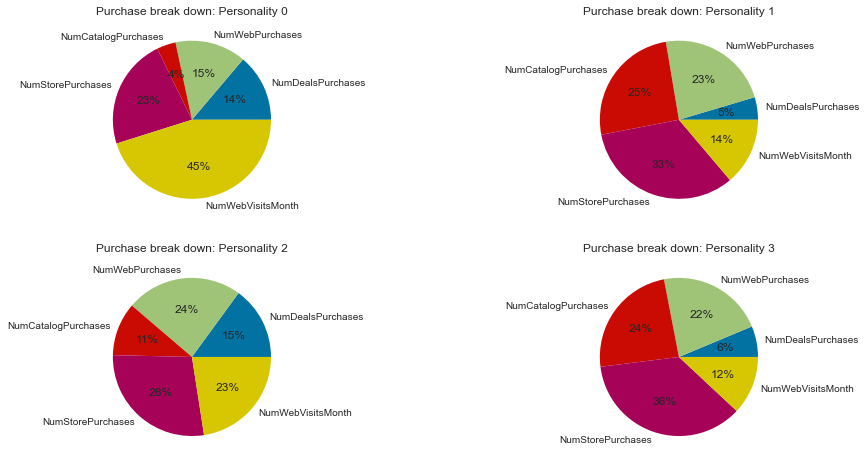

In [123]:
fig=plt.figure(figsize=(16, 8))
num_p1 = pd.DataFrame(columns=['Num'])
num_p2 = pd.DataFrame(columns=['Num'])
num_p3 = pd.DataFrame(columns=['Num'])
num_p4 = pd.DataFrame(columns=['Num'])

nums = [num_p1, num_p2, num_p3, num_p4]
pers = [personality_0, personality_1, personality_2, personality_3]

count = 0
for num, per in zip(nums, pers):
    ax = fig.add_subplot(2, 2, count+1)
    num = num_personality(num, per)
    plt.pie(num['Num'], labels=num.index, autopct='%.0f%%')
    plt.title('Purchase break down: Personality {}'.format(count))
    count = count + 1

Observations:
(1) Personality 0 have the highest web visit
(2) Personality 2 have the highest in store purchase behavior

## 8.3. Behavior to campaign

<AxesSubplot:xlabel='Tot_acceptedcmp', ylabel='Count'>

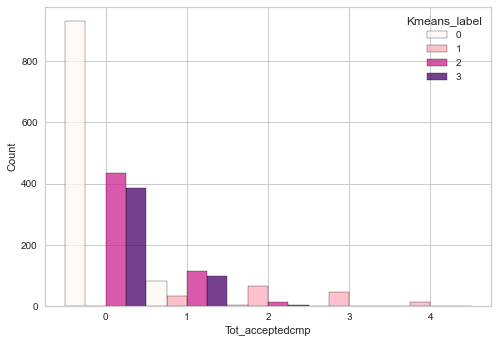

In [124]:
sns.histplot(data = df_cmb, x='Tot_acceptedcmp', hue='Kmeans_label', multiple='dodge', discrete=True, palette="RdPu")

## 8.4 Full analysis

Combine the above information, we summerized the characteristics of each personality:

Personality 0: 
(1) about 46% of all the customers
(2) has the lowest income and lowest spending
(3) The majority is 45-55 years old
(4) has the most kids (2-3) of all clusters, and ~30% are single parent
(5) they visit quite a lot of the company's website

Personality 1:
(1) about 25% of all the customers
(2) has the 2nd lowest income and 2nd lowest spending
(3) The majority is about 50-70 years old
(4) has the 2nd most kids (1-3) among all clusters, and also ~30% are single parent
(5) 64% of their purchase is for wine

Personality 2:
(1) about 22% of all the customers
(2) has the 2nd highest income and 2nd highest spending
(3) their age distribution is wider, from 30-70
(4) has relative fewer kids (0-1)
(5) buy highest percentage of meat/fish among all the clusters

Personality 3:
(1) about 7% of all the customers
(2) has the highest income and highest spending
(3) relatively youngest among all the clusters
(4) has relatively fewer kids (0-1)
